In [1]:
!pip install kaggle

     |████████████████████████████████| 61kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 4.3MB/s eta 0:00:011
  Stored in directory: /Users/fengyongxiang/Library/Caches/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Stored in directory: /Users/fengyongxiang/Library/Caches/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [2]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: rename kaggle.json to /Users/fengyongxiang/.kaggle/kaggle.json: No such file or directory


In [3]:
! mkdir -p ~/.kaggle/

In [6]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 2.86MB/s]


In [8]:
!chmod 600 /Users/fengyongxiang/.kaggle/kaggle.json

In [9]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ID = train['Id']
# print(ID.head(20))
# plt.plot(ID)
# plt.show()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

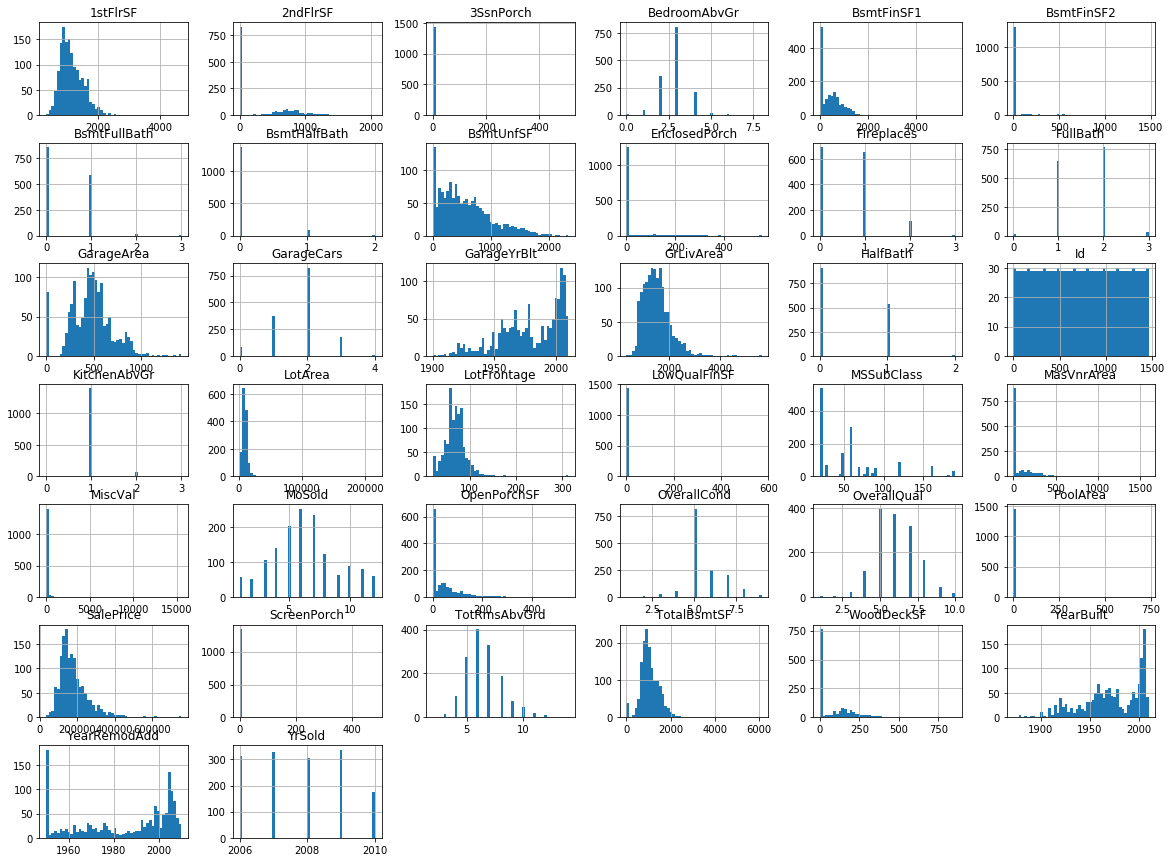

In [17]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))
plt.show()

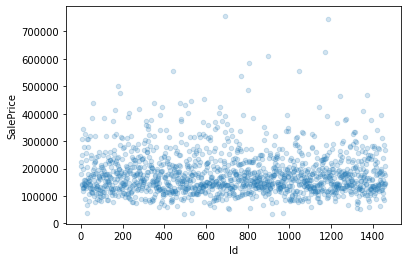

In [18]:
train_copy = train.copy()
train_copy.plot(kind='scatter', x='Id', y='SalePrice', alpha = 0.2)

In [19]:
corr_train = train_copy.corr()
corr_train['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [20]:
from sklearn.impute import SimpleImputer

imputer_ = SimpleImputer(strategy = 'median')
# train_num = train_num.drop('MasVnrType', axis=1)
# train_num = train_num.drop('BsmtQual', axis=1)
# train_num = train_num.drop('BsmtCond', axis=1)
# train_num = train_num.drop('BsmtExposure', axis=1)
# train_num = train_num.drop('BsmtFinType1', axis=1)
# train_num = train_num.drop('Electrical', axis=1)
# train_num = train_num.drop('FireplaceQu', axis=1)
# train_num = train_num.drop('GarageType', axis=1)
# train_num = train_num.drop('GarageFinish', axis=1)
# train_num = train_num.drop('GarageQual', axis=1)
# train_num = train_num.drop('GarageCond', axis=1)
# train_num = train_num.drop('PoolQC', axis=1)
# train_num = train_num.drop('Fence', axis=1)
# train_num = train_num.drop('MiscFeature', axis=1)
# train_num = train_num.drop('BsmtFinType2', axis=1)

median = train['LotFrontage'].median()
print(median)
train.fillna(0)

train.info()
print(train)
# imputer_.fit(train_num)
# print(imputer_)

69.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 